# Histogram Equalization

A histogram is a representation of frequency distribution. It is the basis for numerous spatial domain processing techniques. Histogram manipulation can be used for image enhancement. 

Contrast is defined as the difference in intensity between two objects in an image. If the contrast is too low, it is impossible to distinguish between two objects, and they are seen as a single object. 

Histogram equalization is a widely used contrast-enhancement technique in image processing because of its high eﬃciency and simplicity. It is one of the sophisticated methods for modifying the dynamic range and contrast of an image by altering that image such that its intensity histogram has the desired shape. It can be classified into two branches as per the transformation function is used.

# What is an image Histogram?


The histogram for any image acts as the graphical representation of the distribution of the intensity of the image. The histogram plots the number of pixels according to the intensity values. The image histogram describes an image by its intensity distribution. The image histogram for each intensity value considered quantifies the number of pixels.

# What is Histogram Equalization in OpenCV?

Histogram equalization is an image processing method to adjust the contrast of an image using its intensity distribution histogram.

The equalization method increases the value of global contrast when the close contrast values represent the usable data for the image. Through the adjustments of the contrast values of the image, the intensity distribution of the image becomes clearer. Local regions of the image with lower contrast values gain a higher contrast value.

Histogram equalization method effectively spreads the frequent intensity values of the image. The histogram equalization method effectively spreads out the clustered intensity values. This improves the contrast of the image, while the intensity range of the image is stretched. Images with both dark or bright backgrounds and foregrounds benefit from this method.

cv2.equalizeHist() function in OpenCV performs histogram equalization to improve the contrast of the images and stretch the intensity range for the image histogram. The function takes a grayscale image as the input and returns an equalized image.

In [1]:
# Importing OpenCV and others Libraries

## Importing pandas
import pandas as pd

## Importing numpy
import numpy as np

#Importing OpenCV
import cv2 

# Importing matplotlib.pyplot
import matplotlib.pyplot as plt


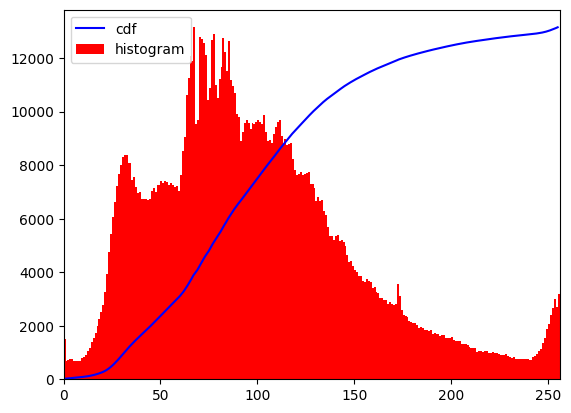

In [6]:
# Loading the Image in grayscale mode using OpenCV
img = cv2.imread('mountain.jpg', cv2.IMREAD_GRAYSCALE)

# Asserting the Image Validity
assert img is not None, "file could not be read, check with os.path.exists()"

# Histogram Calculation
hist,bins = np.histogram(img.flatten(),256,[0,256])

#Cumulative Distribution Function (CDF) Calculation
cdf = hist.cumsum()

#Normalize the CDF
cdf_normalized = cdf * float(hist.max()) / cdf.max()

#Plotting
#This line plots the normalized CDF in blue.
plt.plot(cdf_normalized, color = 'b')

#This line plots the histogram of the input image in red
plt.hist(img.flatten(),256,[0,256], color = 'r')

#Additional Plot Customization
#These lines set the x-axis limits to [0, 256] and add a legend to the plot indicating which curve corresponds to the CDF and which corresponds to the histogram.
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.show()

# Implementing Histograms Equalization in OpenCV 

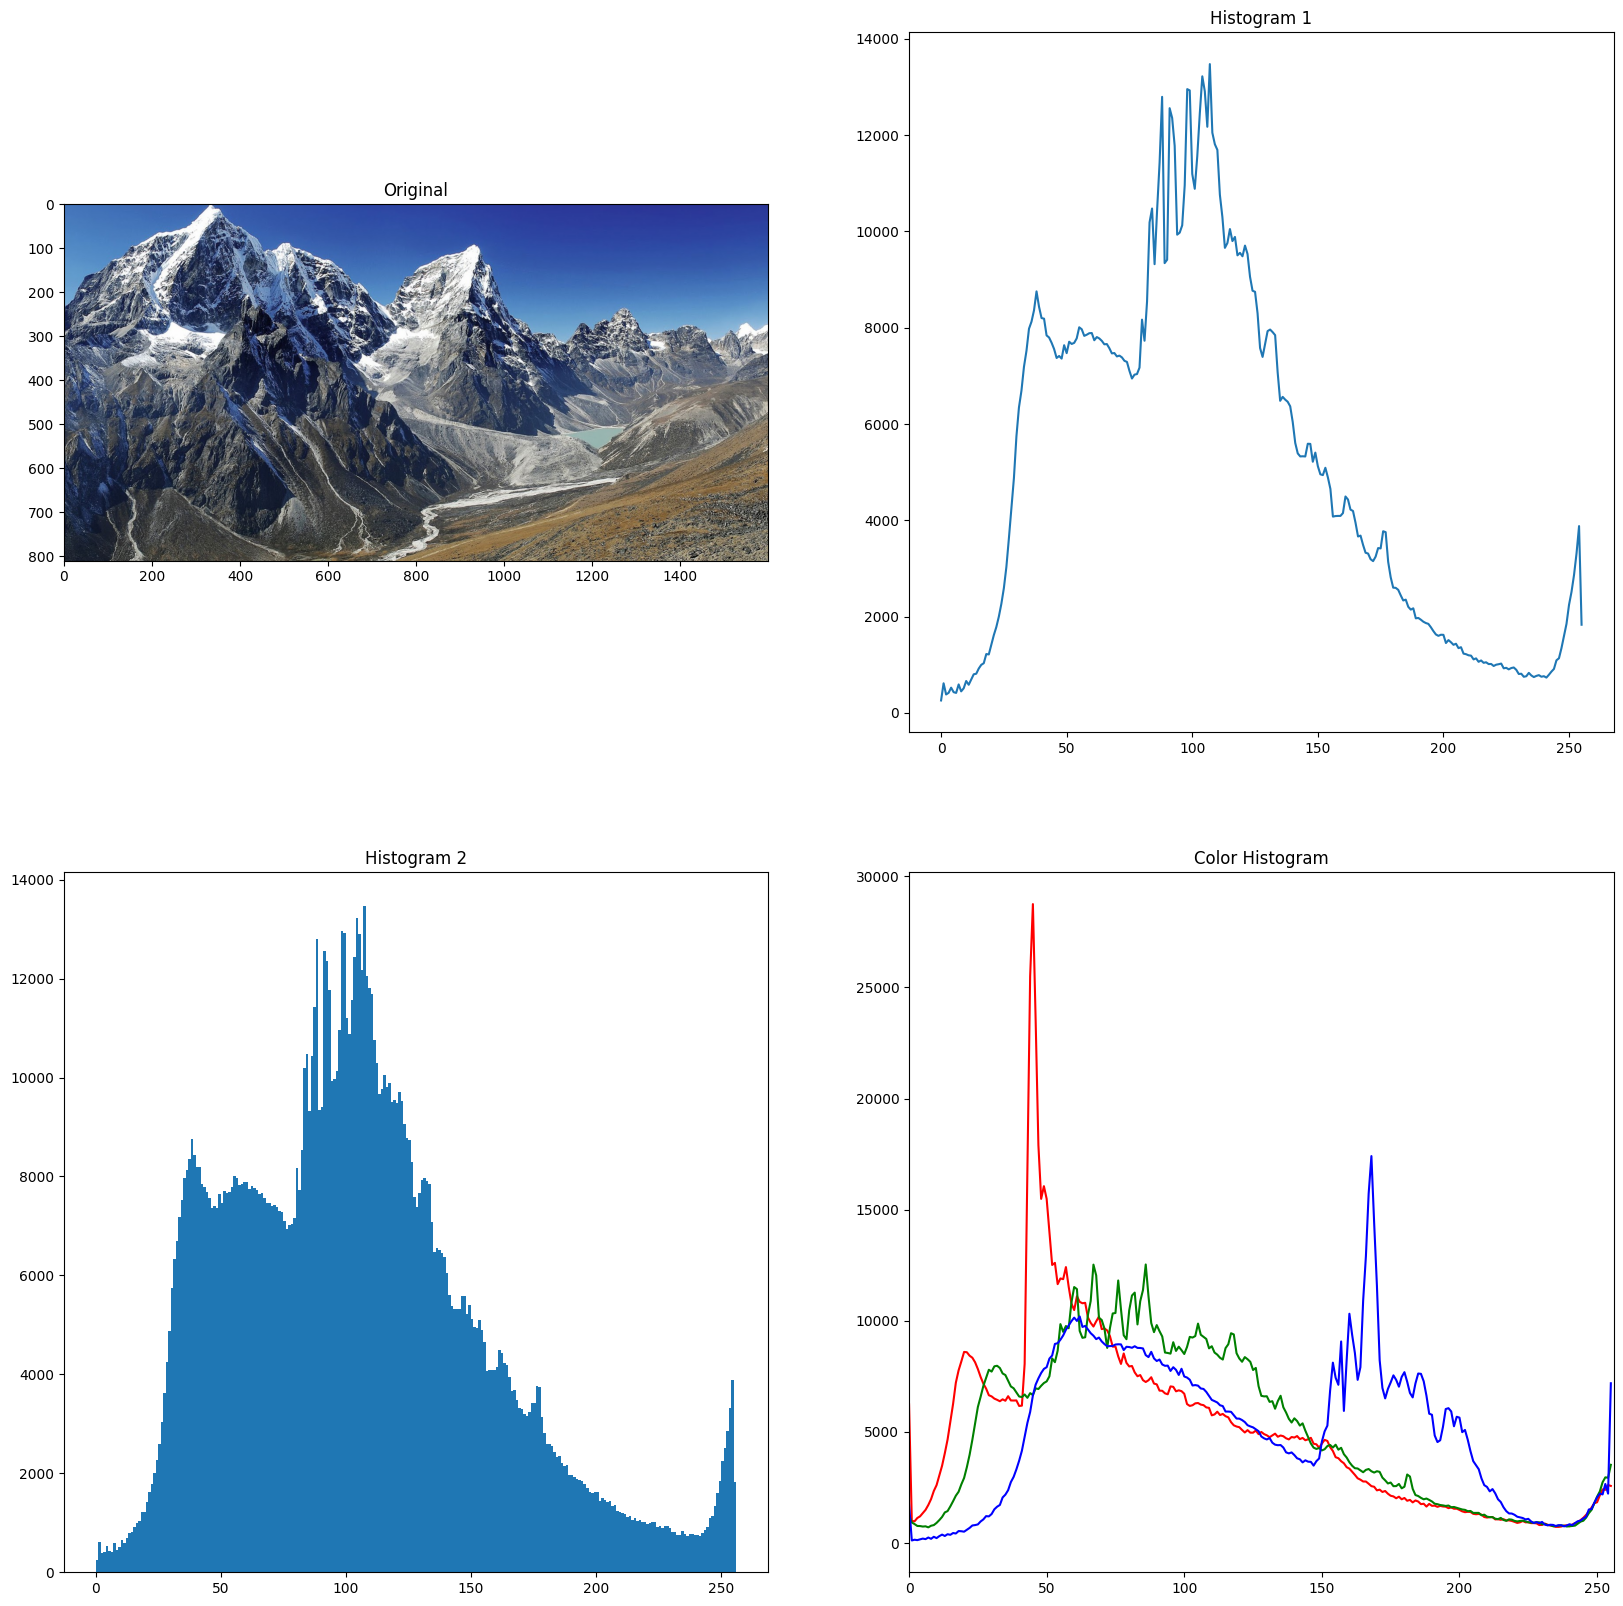

In [8]:
# Reading the image
img = cv2.imread("mountain.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Setting the grid size
plt.figure(figsize=(20, 20))

# Plotting the original image
plt.subplot(221)
plt.title('Original')
plt.imshow(img)

# Plotting the histogram for the image
img_hist = cv2.calcHist([img_1], [0], None, [256], [0, 256])
plt.subplot(222)
plt.title('Histogram 1')
plt.plot(img_hist)

# Plotting the histogram using the ravel function
plt.subplot(223)
plt.hist(img_1.ravel(), 256, [0, 256])
plt.title('Histogram 2')

# Plotting the histogram for colors in the image
for i, col in enumerate(['r', 'g', 'b']):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(224)
    plt.title('Color Histogram')
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

plt.show()


# Histogram equalization of grayscale image

The cv2.equalizeHist() function takes a grayscale image as input. Therefore we can simply provide a grayscale image for equalization. The equalized image in the output has improved contrast as compared to the original image. The cv2.equalizeHist() function returns an image with improved contrast and stretches the intensity range for the image histogram.

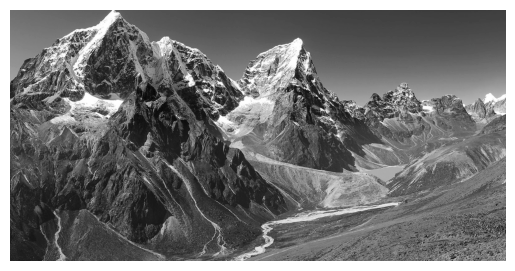

In [9]:
import cv2
import matplotlib.pyplot as plt

# Reading the image
img = cv2.imread("mountain.jpg", 0)

# Displaying the original image using Matplotlib
plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

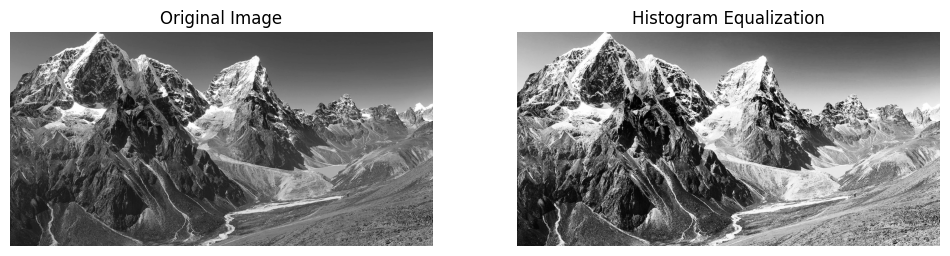

In [10]:
# Applying histogram equalization
final_image = cv2.equalizeHist(img)

# Displaying the original and equalized images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(final_image, cmap='gray')
plt.title("Histogram Equalization")
plt.axis('off')

plt.show()

# Histogram equalization of color image

The channels of the RGB color space represent the intensity of the associated color and not the brightness of the whole image. The application of histogram equalization on the color channels will not give us the desired results. The brightness of the image has to be separated from the color channels and then histogram equalization can be applied.

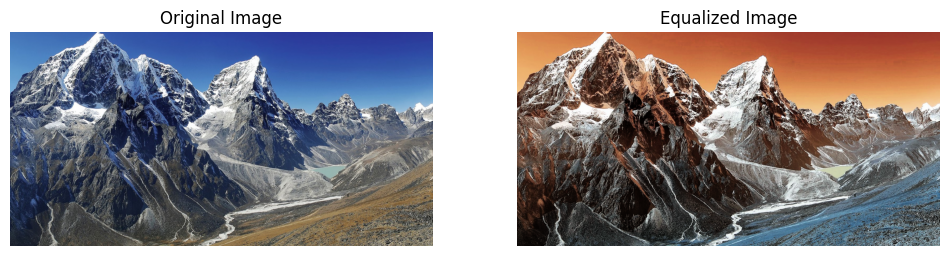

In [11]:
# Reading the image
image = cv2.imread("mountain.jpg")

# Convert image from RGB to HSV
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Histogram equalization on the V-channel
img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])

# Convert image back from HSV to RGB
image_equalized = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

# Displaying the original and equalized images using Matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Original Image")

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_equalized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Equalized Image")

plt.show()